# Genereating GBM Sample Paths

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Example usage
T = 1       # Total time
n = 100     # Number of time steps
r = 0.05   # Drift coefficient
σ = 0.25 # Volatility coefficient
S0 = 100    # Initial stock value
dim = 10    # Number of paths to simulate

In [3]:
def GeometricBrownianMotion(T, n, r, σ, S0, dim):
    """
    Generate GBM paths.

    Parameters:
    S0 (float): Initial asset value
    T (float): Total time period
    r (float): Risk-free interest rate
    σ (float): Volatility coefficient for diffusion
    n (int): Number of time steps
    dim (int): Number of paths to simulate

    Returns:
    np.ndarray: Simulated paths of the asset price
    """ 
    Δ = T / n  # equidistant tep length
    Z = np.random.normal(0, 1, (n, dim))  # White noise (drawn all at once)
    S = np.full((n + 1, dim), np.nan)  # Space for GBM, with an extra step for initial value
    
    S[0, :] = np.log(S0)  # Set initial values
    for i in range(n):
        S[i + 1, :] = S[i, :] + (r - 0.5 * σ**2) * Δ + σ * np.sqrt(Δ) * Z[i, :]
    S = np.exp(S)  # Exponentiate to get the GBM paths
    
    return S

gbm_paths = GeometricBrownianMotion(T, n, r, σ, S0, dim)

In [4]:
# Define time interval 
time = np.linspace(0, T, n+1)
tt = np.broadcast_to(time[:, None], (n+1, dim))

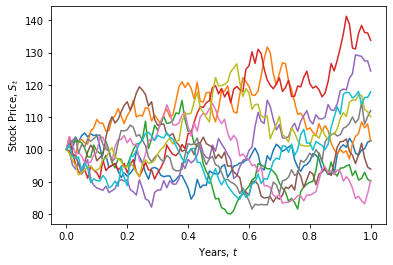

In [5]:
# plot
plt.plot(tt, gbm_paths)
plt.xlabel("Years, $t$")
plt.ylabel("Stock Price, $S_t$")
plt.show()